Top 10 Most Common Hashtags:
             Hashtag  Frequency
0   #AvengersEndgame      13124
1    #CaptainAmerica        965
2        #BlackWidow        516
3           #IronMan        506
4     #CaptainMarvel        438
5     #FunkoAvengers        410
6          #Avengers        384
7  #hmvAvengersEndga        250
8           #Endgame        236
9      #ContestAlert        193


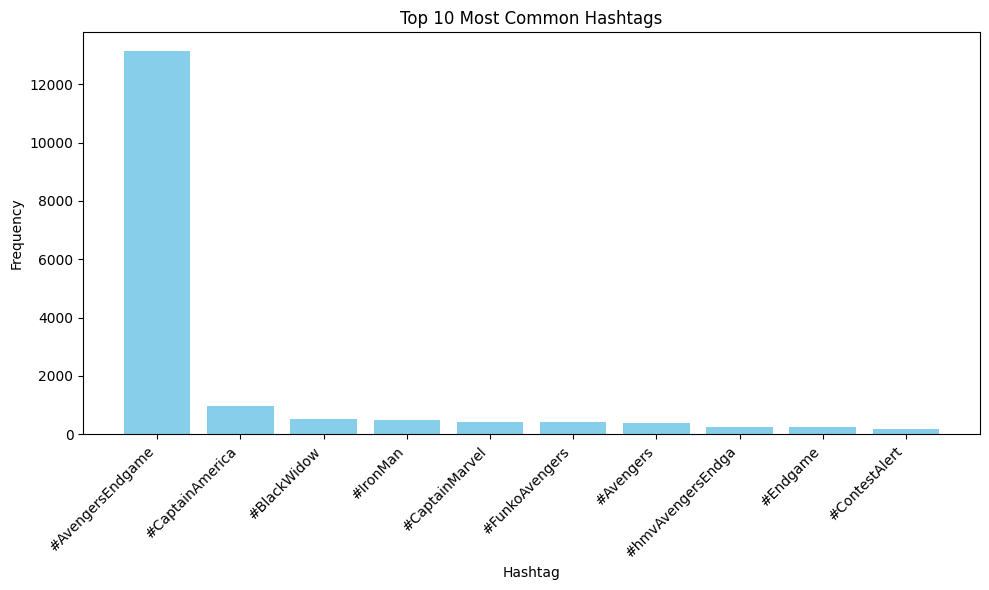

In [ ]:
import pandas as pd
import re

# Load your dataset
df = pd.read_csv("/content/tweets.csv", encoding='latin1')  # Replace "your_dataset.csv" with the path to your dataset

# Function to extract hashtags from text
def extract_hashtags(text):
    hashtags = re.findall(r'#\w+', str(text))
    return hashtags

# Extract hashtags from the "text" column
df['Hashtags'] = df['text'].apply(extract_hashtags)

# Create a list of all hashtags
all_hashtags = [tag for sublist in df['Hashtags'] for tag in sublist]

# Count the frequency of each hashtag
hashtag_counts = pd.Series(all_hashtags).value_counts().reset_index()
hashtag_counts.columns = ['Hashtag', 'Frequency']

# Display the top 10 most common hashtags
top_hashtags = hashtag_counts.head(10)
print("Top 10 Most Common Hashtags:")
print(top_hashtags)

# Visualize the top hashtags
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_hashtags['Hashtag'], top_hashtags['Frequency'], color='skyblue')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Hashtags')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter

# Function to find co-occurring hashtags
def find_co_occurring_hashtags(hashtags_series):
    co_occurrences = Counter()
    for hashtags in hashtags_series:
        for i, hashtag1 in enumerate(hashtags):
            for hashtag2 in hashtags[i+1:]:
                if hashtag1 != hashtag2:
                    co_occurrences[(hashtag1, hashtag2)] += 1
    return co_occurrences

# Find co-occurring hashtags
co_occurrences = find_co_occurring_hashtags(df['Hashtags'])

# Display the top 10 co-occurring hashtags
top_co_occurrences = co_occurrences.most_common(10)
print("Top 10 Co-occurring Hashtags:")
for pair, count in top_co_occurrences:
    print(pair, count)


Top 10 Co-occurring Hashtags:
('#CaptainAmerica', '#AvengersEndgame') 834
('#IronMan', '#AvengersEndgame') 473
('#BlackWidow', '#AvengersEndgame') 469
('#AvengersEndgame', '#FunkoAvengers') 410
('#CaptainMarvel', '#AvengersEndgame') 399
('#AvengersEndgame', '#hmvAvengersEndga') 250
('#CONTEST', '#Avengers') 160
('#WinterSoldier', '#AvengersEndgame') 151
('#Hawkeye', '#AvengersEndgame') 142
('#AvengersEndgame', '#Avengers') 141


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your dataset
df = pd.read_csv("/content/tweets.csv", encoding='latin1')  # Replace "your_dataset.csv" with the path to your dataset

# Preprocess the text data
# (you can reuse the preprocess_text function defined earlier)
# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords, punctuation, and single-character tokens
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# Apply preprocessing to the 'Text' column
df['Processed_Text'] = df['text'].apply(preprocess_text)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, min_df=2, stop_words='english', use_idf=True)

# Apply K-means clustering
num_clusters = 5  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters)
pipeline = make_pipeline(vectorizer, Normalizer(), kmeans)

# Fit the model
pipeline.fit(df['Processed_Text'])

# Assign cluster labels to each tweet
df['Cluster'] = pipeline.predict(df['Processed_Text'])

# Display the clusters
print(df[['screenName', 'text', 'Cluster']])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            screenName                                               text  \
0            DavidAc96  RT @mrvelstan: literally nobody:\r\nme:\r\n\r\...   
1              NRmalaa  RT @agntecarter: im emotional, sorry!!\r\n\r\...   
2             jijitsuu  saving these bingo cards for tomorrow \r\n©\r\...   
3             SahapunB  RT @HelloBoon: Man these #AvengersEndgame ads ...   
4          stella22_97  RT @Marvel: We salute you, @ChrisEvans! #Capta...   
...                ...                                                ...   
14995        tommysboi  RT @natsdany: First time                  Last...   
14996  kimberleywithae  RT @MTVNEWS: The #AvengersEndgame cast has see...   
14997       Gnanavel07  @SPICinemas kindly announce the approximate ti...   
14998       _moonljght  RT @Marvel: We salute you, @ChrisEvans! #Capta...   
14999  CaterinaCabrel1  RT @Avengers: Welcome to the party, @RobertDow...   

       Cluster  
0            0  
1            0  
2            0  
3      

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv("/content/tweets.csv", encoding='latin1')  # Replace "your_dataset.csv" with the path to your dataset

# Preprocess the text data
# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords, punctuation, and single-character tokens
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# Apply preprocessing to the 'Text' column
df['Processed_Text'] = df['text'].apply(preprocess_text)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, min_df=2, stop_words='english', use_idf=True)

# Transform the text data into TF-IDF features
tfidf_matrix = vectorizer.fit_transform(df['Processed_Text'])

# Apply K-means clustering
num_clusters = 3  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Get cluster labels for each tweet
cluster_labels = kmeans.labels_

# Print sample tweets from each cluster
for i in range(num_clusters):
    print(f"Cluster {i}:")
    sample_tweets = df.loc[cluster_labels == i, 'text'].sample(n=5, random_state=42).tolist()
    for tweet in sample_tweets:
        print(f" - {tweet}")
    print()



Cluster 0:
 - RT @Avengers: We salute you, @ChrisEvans! #CaptainAmerica #AvengersEndgame https://t.co/S4ZfBSGGQ0
 - RT @Avengers: We salute you, @ChrisEvans! #CaptainAmerica #AvengersEndgame https://t.co/S4ZfBSGGQ0
 - RT @Marvel: Black Widow herself, Scarlett Johansson. #BlackWidow #AvengersEndgame https://t.co/UNyj3gWW65
 - RT @Marvel: Black Widow herself, Scarlett Johansson. #BlackWidow #AvengersEndgame https://t.co/UNyj3gWW65
 - RT @Marvel: We salute you, @ChrisEvans! #CaptainAmerica #AvengersEndgame https://t.co/VlPEpnXYgm

Cluster 1:
 - RT @HelloBoon: Man these #AvengersEndgame ads are everywhere https://t.co/Q0lNf5eJsX
 - RT @HelloBoon: Man these #AvengersEndgame ads are everywhere https://t.co/Q0lNf5eJsX
 - RT @HelloBoon: Man these #AvengersEndgame ads are everywhere https://t.co/Q0lNf5eJsX
 - RT @HelloBoon: Man these #AvengersEndgame ads are everywhere https://t.co/Q0lNf5eJsX
 - RT @HelloBoon: Man these #AvengersEndgame ads are everywhere https://t.co/Q0lNf5eJsX

Cluster 2:
 - 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
